<a href="https://colab.research.google.com/github/KeyboarderSon/TIL/blob/main/SimpleSTT/Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.analyticsvidhya.com/blog/2019/07/learn-build-first-speech-to-text-model-python/


## Time domain and Frequency domain

```
time-domain 에서는 frequency의 비율을 알 수 없고,
frequency-domain 에서는 시간과 관련한 정보를 알 수 없다.
```


## Spectrogram

```
위의 한계를 해소하여 time과 frequency의 amplitude를 동시에 나타낼 수 있게 되었다.
각 점은 특정 time, frequency에 대한 amplitude를 다른 색깔로써 나타내었다.
``` 

![Spectrogram by wikipedia](https://upload.wikimedia.org/wikipedia/commons/c/c5/Spectrogram-19thC.png)


## Dataset 다운받기 위한 준비

https://dschloe.github.io/kaggle/colab_with_drive/ 를 참고하였습니다

kaggle 홈페이지 > account > create new token > kaggle.json파일 다운

In [ ]:
pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.10)


In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  
# kaggle.json을 아래 폴더로 옮긴 뒤, file을 사용할 수 있도록 권한을 부여한다. 
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
uploaded file "kaggle.json" with length 62 bytes


In [ ]:
!ls -1ha ~/.kaggle/kaggle.json

/root/.kaggle/kaggle.json


In [1]:
from google.colab import drive # 패키지 불러오기 

ROOT = "/content/drive"     # 드라이브 기본 경로
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # 드라이브 기본 경로 Mount

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from os.path import join  

MY_GOOGLE_DRIVE_PATH = 'My Drive/SimpleSTT/data'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/My Drive/SimpleSTT/data


In [3]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/SimpleSTT/data


In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         99           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        206           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        391           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2673           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      20617           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       5429           False  
connectx

```

https://www.kaggle.com/c/tensorflow-speech-recognition-challenge/rules 에서 데이터셋을 다운받는다.
다운이 안되면 rules에서 accept를 하고 다시 다운받는다.

```

In [ ]:
!kaggle competitions download -c tensorflow-speech-recognition-challenge

 99% 1.03G/1.04G [00:11<00:00, 103MB/s]
100% 1.04G/1.04G [00:11<00:00, 96.9MB/s]
  0% 0.00/50.0 [00:00<?, ?B/s]
100% 50.0/50.0 [00:00<00:00, 6.87kB/s]
  0% 0.00/501k [00:00<?, ?B/s]
100% 501k/501k [00:00<00:00, 32.1MB/s]
100% 2.46G/2.46G [00:37<00:00, 75.1MB/s]
100% 2.46G/2.46G [00:37<00:00, 69.5MB/s]


* * *

## Dataset을 보자

In [4]:
import os
import librosa#for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile#for audio processing
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!7z x /content/drive/MyDrive/SimpleSTT/data/train.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/SimpleSTT/data/                                                1 file, 1121103842 bytes (1070 MiB)

Extracting archive: /content/drive/MyDrive/SimpleSTT/data/train.7z
--
Path = /content/drive/MyDrive/SimpleSTT/data/train.7z
Type = 7z
Physical Size = 1121103842
Headers Size = 389133
Method = Delta LZMA2:24
Solid = +
Blocks = 2

  0%      0% 2 - train/audio/_background_noise_                                       
Would you like to replace the existing file:
  Path:     ./train/LICENSE
  Size:     18651 bytes (19 KiB)
  Modified: 2017-11-13 21:13:13


0에서 1.0동안 16000개의 점으로 [ 0.00042725 -0.00021362 -0.00042725 ...  0.00057983  0.00061035
  0.00082397]의 모양을 나타냄


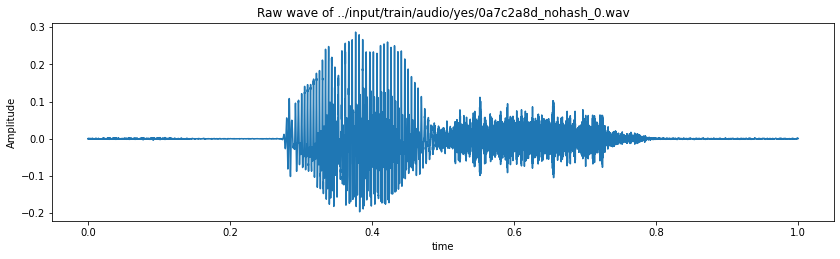

In [5]:
train_audio_path = PROJECT_PATH+'/train/audio/'
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)
print("0에서 "+str(sample_rate/len(samples))+"동안 "+str(sample_rate)+"개의 점으로 "+str(samples)+"의 모양을 나타냄")

In [6]:
print(len(samples))
print(sample_rate)

16000
16000


### 기존 Sampling Rate

In [7]:
ipd.Audio(samples, rate=sample_rate)
#print(sample_rate)

### Resampling

```
1초에 16000개였던 것을, 8000개로 resampling 했더니 당연히 음질이 떨어진다.
```

In [8]:
samples=librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

In [9]:
#/train/audio/내에 각 하단 폴더가 들어있다
labels=os.listdir(train_audio_path)
print(labels[:10])

['bed', '_background_noise_', 'dog', 'down', 'house', 'cat', 'eight', 'left', 'happy', 'four']


In [10]:
no_of_recordings=[]
#라벨이 지칭하는 것은 'bed', '_background_noise_', ...
#그 폴더 내에 wav로 끝나는 f가 있다면 wave다.
#각 폴더 내 wav파일 두개씩만 print한 것이다.
for label in labels:
  waves=[f for f in os.listdir(train_audio_path+'/'+label) if f.endswith('.wav')]
  print(waves[:2])
  no_of_recordings.append(len(waves))

#각 라벨 폴더 내 wav 파일의 갯수
print(no_of_recordings)

['5b09db89_nohash_0.wav', '11b1df78_nohash_0.wav']
['exercise_bike.wav', 'doing_the_dishes.wav']
['e62056e2_nohash_1.wav', '813b82a6_nohash_0.wav']
['c9b653a0_nohash_3.wav', 'da15e796_nohash_1.wav']
['2903efb3_nohash_0.wav', '4fd4d073_nohash_0.wav']
['8a1c449e_nohash_0.wav', '1dce06e8_nohash_1.wav']
['3a70ab7f_nohash_0.wav', '83957201_nohash_0.wav']
['cf8d91cf_nohash_0.wav', '89ed36ab_nohash_1.wav']
['7cbf645a_nohash_0.wav', 'cb5d2c6e_nohash_0.wav']
['0bde966a_nohash_0.wav', '338dacf5_nohash_2.wav']
['a2fefcb4_nohash_0.wav', 'f804cbb3_nohash_0.wav']
['1942abd7_nohash_0.wav', '32a19ecf_nohash_0.wav']
['f92e49f3_nohash_0.wav', '6d2d3b0d_nohash_1.wav']
['a42a88ff_nohash_0.wav', '6c429c7b_nohash_1.wav']
['1df99a8a_nohash_0.wav', 'aa62fdad_nohash_0.wav']
['9d7036f9_nohash_0.wav', '0132a06d_nohash_0.wav']
['10ace7eb_nohash_1.wav', 'da5dadb9_nohash_0.wav']
['1fd85ee4_nohash_1.wav', '51eefcc6_nohash_0.wav']
['dc269564_nohash_2.wav', '324210dd_nohash_1.wav']
['238c112c_nohash_0.wav', '6af4aa07_

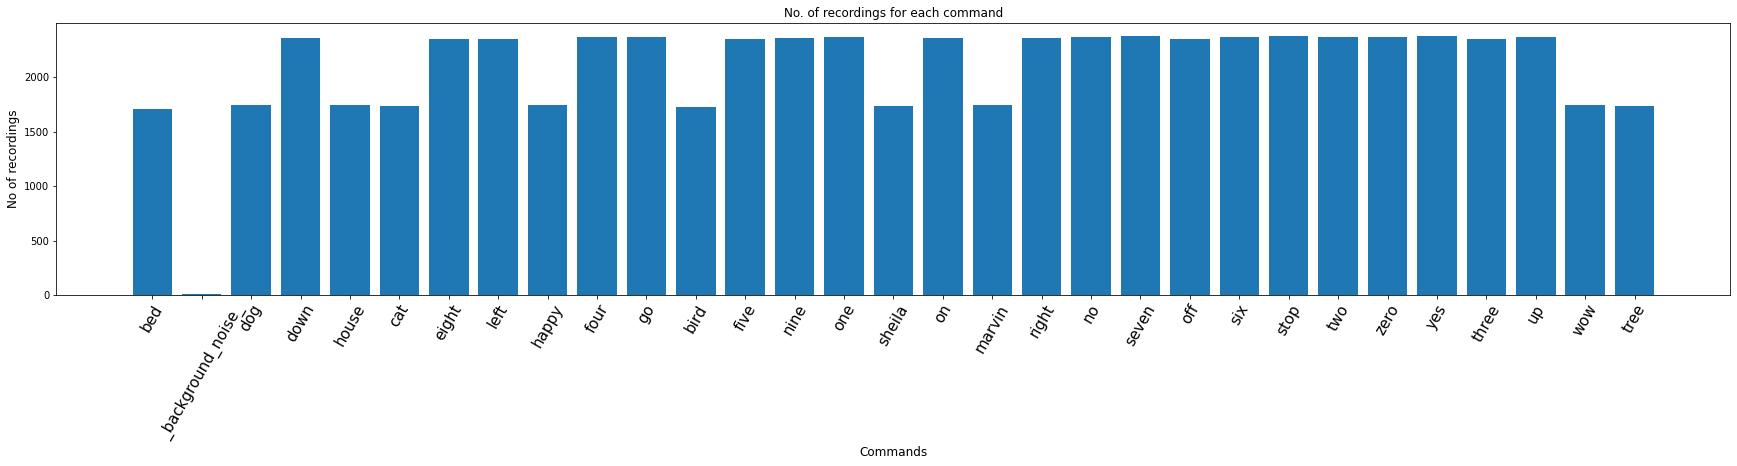

In [11]:
#plot
plt.figure(figsize=(30,5))
index=np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()


In [12]:
labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]


### Duration of recordings

wav 파일의 길이(초단위)를 살펴보자.

doing..
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
done!!
doing..
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
done!!
doing..
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
done!!
doing..
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
done!!
doing..
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개 완료
	100개

(array([1.5000e+01, 3.0000e+01, 4.4000e+01, 1.3800e+02, 1.3600e+02,
        1.7900e+02, 3.6600e+02, 4.3400e+02, 5.9300e+02, 2.1747e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <a list of 10 Patch objects>)

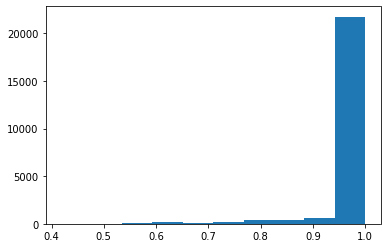

In [13]:
duration_of_recordings=[]
for label in labels:
    print("doing..")
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
        if len(duration_of_recordings)%100==0:
          print("\t100개 완료")
    print("done!!")
plt.hist(np.array(duration_of_recordings))